![LogoUC3M](https://www.fundacion.uc3m.es/wp-content/uploads/2018/11/Logo-UC3M-nuevo.png)

### Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
---
# **Cuaderno 1** - Práctica 1: Predicción de la producción de energía
***Grupo Reducido 82 - Grupo de laboratorio 13***






# **Carga de datos**


Para comenzar, importaremos las librerías que necesitamos:

+ `linear-tree`: Implementación de los modelos de árboles.
+ `statsmodels`: Para los intervalos de confianza.


In [ ]:
!pip install --upgrade linear-tree
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Una vez instaladas las bibliotecas necesarias, importamos **Numpy** y **Pandas** ya que los necesitaremos para el desarrollo de la práctica.
Destacar que nos referiremos a **Numpy** como *np* y a **Pandas** como *pd* por simplicidad.

In [ ]:
import numpy as np
import pandas as pd

A continuación, cargaremos los datos necesarios. Dado que somos el grupo 13, usaremos los dos conjuntos de datos correspondientes.</br></br>
Por una parte, tenemos los **datos disponibles**, que nos servirán para entrenar, 
evaluar y construir el modelo final y por otra parte los **datos de competición** sobre los que usaremos el modelo final para hacer las predicciones correspondientes.</br></br>

In [ ]:
# Datos disponibles.
disp_df = pd.read_csv("disp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Datos competición.
comp_df = pd.read_csv("comp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Mostramos la información de cada conjunto de datos.
print(f"El conjunto de datos disponibles tiene {len(disp_df)} instancias.")
print(f"El conjunto de datos de competición tiene {len(disp_df)} instancias.")

El conjunto de datos disponibles tiene 4380 instancias.
El conjunto de datos de competición tiene 4380 instancias.


A continuación, separamos la **matriz de atributos** (**X**) y el **vector de la variable de respuesta** *salida* (**y**).

In [ ]:
# Datos.
X = disp_df.drop('salida', axis=1)

# Etiquetas.
y = disp_df.salida

# **Análisis Exploratorio de Datos (EDA)**

*   Elemento de lista
*   Elemento de lista


Antes de comenzar, destacar que dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*).</br></br>
Para poder realizar el análisis exploratorio de datos, llevaremos a cabo los siguientes pasos:

+ Número de instancias y atributos.
+ Tipo de atributos (numéricos o categóricos).
+ Missing values.
+ Tipo de problema (clasificación o regresión).


### **Número de instancias y atributos**
Los **datos disponibles** cuentan con 75 atributos y la variable de respuesta *salida*. Contiene 12 años de datos considerando una instancia por día y todos los años de 365 días. Por tanto, contamos con un total de **4380 instancias**.</br></br>

Los **datos de competición** cuentan con las mismas 75 variables de entrada que los datos disponibles y se trata de un conjunto con 2 años de datos y una instancia por día. En este caso, no se proporciona la variable de respuesta salida, dado que usaremos nuestro modelo final para hacer predicciones sobre estos datos como ya hemos indicado antes. Por tanto, contamos con un total de **733 instancias**.</br></br>

A continuación, profundizaremos más en los atributos, su significado y nomenclatura.</br></br>

Como podemos ver en la siguiente tabla, contamos con **15 atributos** diferentes, cada uno de ellos con su respectivo nombre (identificador) y con su unidad concreta. Estos atributos corresponden con **variables meteorológicas** diversas.</br></br>

| Atributo | Descripción | Unidades |
| :- | :- | -: |
| `apcp_sfc` | Precipitación acumulada de 3 horas en la superficie. | $\dfrac{kg}{m^2}$ |
| `dlwrf_sfc` | Promedio de flujo radiativo de onda larga hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `dswrf_sfc` | Promedio de flujo radiativo de onda corta hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `pres_msl` | La presión del aire al nivel medio del mar. | $Pa$ |
| pwat_eatm	 | Agua precipitable sobre toda la profundidad de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `spfh_2m`	 | Humedad específica a 2 m sobre el suelo. | $\dfrac{kg}{kg}$ |
| `tcdc_eatm`	 | Cobertura total de nubes sobre toda la profundidad de la atmósfera. | $\%$ |
| `tcolc_eatm` | Condensado total integrado en la columna sobre toda la atmósfera. | $\dfrac{kg}{m^2}$ |
| `tmax_2m` | Temperatura máxima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmin_2m` | Temperatura mínima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmp_2m` | Temperatura actual a 2 m sobre el suelo.	| $K$ |
| `tmp_sfc` | Temperatura de la superficie. | $K$ |
| `ulwrf_sfc` | Radiación ascendente de onda larga en la superficie. | $\dfrac{kg}{m^2}$ |
| `ulwrf_tatm` | Radiación ascendente de onda larga en la parte superior de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `uswrf_sfc` | Radiación ascendente de onda corta en la superficie. | $\dfrac{kg}{m^2}$ |

</br>Partiendo de los 15 atributos que podemos observar en la tabla anterior, se indica una variable en los datos para cada uno ellos en 5 momentos del día. Esto es, contamos con:</br></br>

$5\;instantes\;de\;tiempo\;\cdot\;15\;variables\;meteorológicas\;=\;75\;variables\;de\;entrada$

</br>Los instantes de tiempo vienen dados por una numeración del 1 al 5:
+ 1 $\rightarrow$ 12h
+ 2 $\rightarrow$ 15h
+ 3 $\rightarrow$ 18h
+ 4 $\rightarrow$ 21h
+ 5 $\rightarrow$ 24h

</br>Por tanto, cada variable meteorológica aparece en el conjunto de datos 5 veces, una por cada instante de tiempo. El instante de tiempo se indica en el subíndice $i$, donde $i=1,2,3,4,5$. Por ejemplo, $apcp\_sfc_1$ es la variable que indica la precipitación acumulada de 3 horas en la superficie a las 12h (instante de tiempo 1).

## **Tipo de atributos**.
Dentro de los diferentes tipos de atributos de los datos podemos encontrar los categóricos, numéricos u ordinales.</br></br>

En el caso de nuestros datos, podemos ver como claramente todos ellos son **atributos numéricos reales** a excepción de la variable de respuesta *salida*, la cual es un **atributo numérico entero**.</br></br>

Por tanto, dado que todos los datos con los que vamos a tratar son atributos numéricos, no tendremos que transformar ninguna variable categórica en one-hot-encoding, dado que no vamos a lidiar con ninguna variable de este tipo.


In [ ]:
# Mostramos todos los datos.
print('Matriz de atributos:\n\n', X)
print('\n\nVector de la variable de respuesta:\n\n', y)

# Mostramos el tipo de dato de una variable meteorológica y de un valor de la variable de respuesta.
print('\nEjemplo de tipo de dato de variable meteorológica:', type(X['apcp_sf1_1'][0]))
print('Ejemplo de tipo de dato de variable de respuesta:', type(y[0]))

Matriz de atributos:

        apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

    

Como se puede comprobar en las dos últimas llamadas realizadas, las variables de respuesta utilizan atributos del tipo `numpy.float64`, siendo estos valores **numéricos reales**. Por otra parte, la variable de respuesta *salida* utiliza valores del tipo `numpy.int64`, siendo estos valores **numéricos enteros**.


### **Missing values**.
A continuación, comprobaremos si existe algún **missing value**. Para ello, tomaremos el dataframe de datos disponibles creado anteriormente y haremos una suma de los posibles missing values existentes.


In [ ]:
# Contamos el número de missing values.
disp_df.isnull().values.sum()

0

Como podemos ver en la anterior ejecución, podemos comprobar que **no existe ningún missing value**.

### **Tipo de problema**.
Como hemos podido ver anteriormente mostrando los datos en pantalla, este problema es claramente de **regresión**, dado que tendremos que construir un modelo para realizar **predicción numérica**.

### **Análisis de atributos**.
A continuación, realizaremos un análisis más profundo de los diferentes atributos con los que contamos. Nuestro objetivo aquí es comprobar si existen correlaciones entre las variables y estudiar de forma individual cada uno de ellos para ver su funcionamiento. De esta forma, veremos si podemos prescindir de algún atributo o ajustar los datos para continuar con la práctica.<br><br>

Por tanto, lo que haremos será calcular las medias de los atributos y hacer una matriz para ver la correlación entre las medias. Tras esto, haremos un pequeño análisis de cada atributo por separado en los distintos momentos del día.

In [ ]:
variables_meteorologicas = ['apcp_sf', 'dlwrf_s', 'dswrf_s', 'pres_msl', 'pwat_eatm', 'spfh_2m', 'tcdc_eatm', 'tcolc_eatm', 'tmax_2m', 'tmin_2m', 'tmp_2m', 'tmp_sfc', 'ulwrf_sfc', 'ulwrf_tatm', 'uswrf_sfc']

mean_df = disp_df.iloc[:, :-1].groupby(np.arange(len(disp_df.columns)-1)//5, axis=1).mean()
mean_df.columns = [f'{name}_meedia' for name in variables_meteorologicas]
mean_df['salida'] = disp_df['salida']
print(mean_df)

       apcp_sf_meedia  dlwrf_s_meedia  dswrf_s_meedia  pres_msl_meedia  \
V1           0.000000      260.405510      208.000000    101926.116761   
V2           0.118545      290.926037      120.727273    101249.524290   
V3           0.003455      231.010220      199.163636    101903.130682   
V4           0.001818      255.539082      181.072727    102395.532955   
V5           0.000000      249.072684      208.909091    100978.042614   
...               ...             ...             ...              ...   
V4376        0.546000      304.778290       87.818182    100995.622159   
V4377        0.000182      255.279823      208.000000    101558.770170   
V4378        0.000000      277.312254      204.181818    101256.869886   
V4379        0.000000      277.291592      209.454545    100085.594460   
V4380        0.000000      277.067550      201.636364    101064.356534   

       pwat_eatm_meedia  spfh_2m_meedia  tcdc_eatm_meedia  tcolc_eatm_meedia  \
V1             9.037209        

Como podemos ver, hemos realizado las medias de los atributos, resultando en un total de 15 columnas además de la variable de salida. A continuación veremos si existen relaciones entre estas variables:

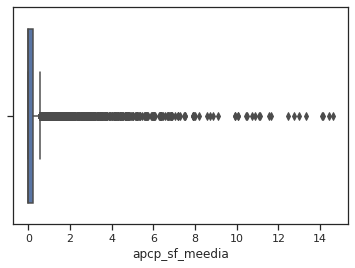

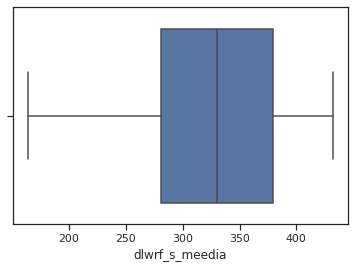

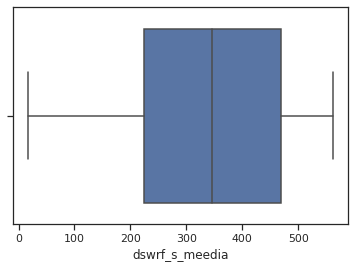

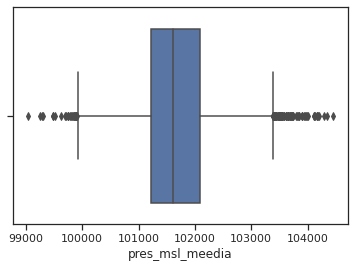

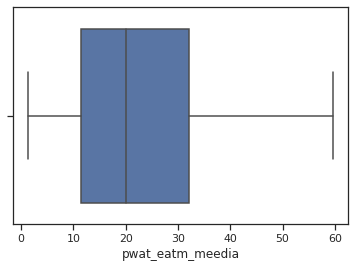

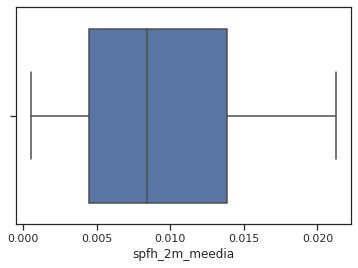

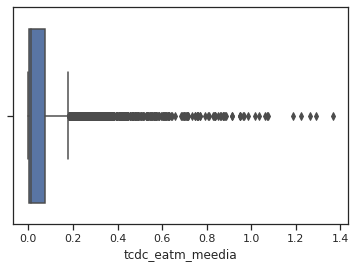

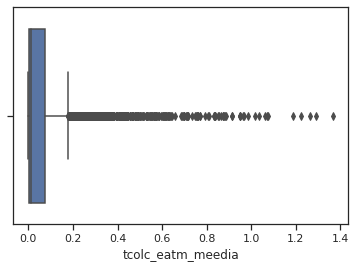

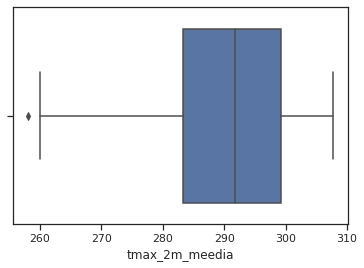

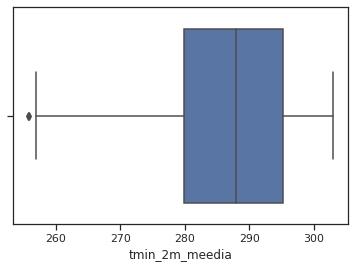

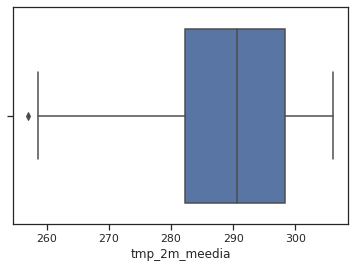

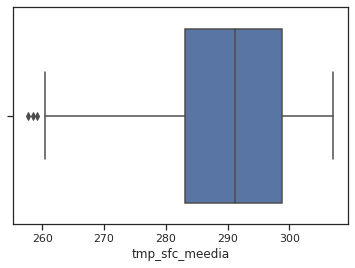

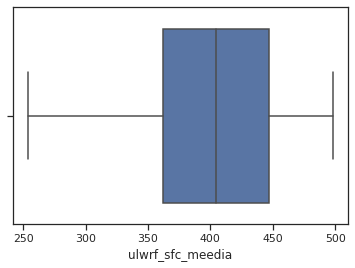

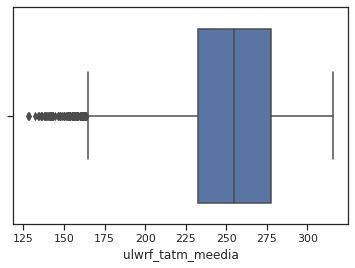

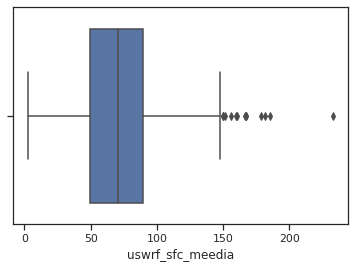

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Seleccionar solo las columnas de las variables meteorológicas
cols = mean_df.columns[:-1]

# Crear un diagrama de cajas para cada variable
for col in cols:
    sns.boxplot(data=mean_df, x=col)
    plt.show()

<Axes: >

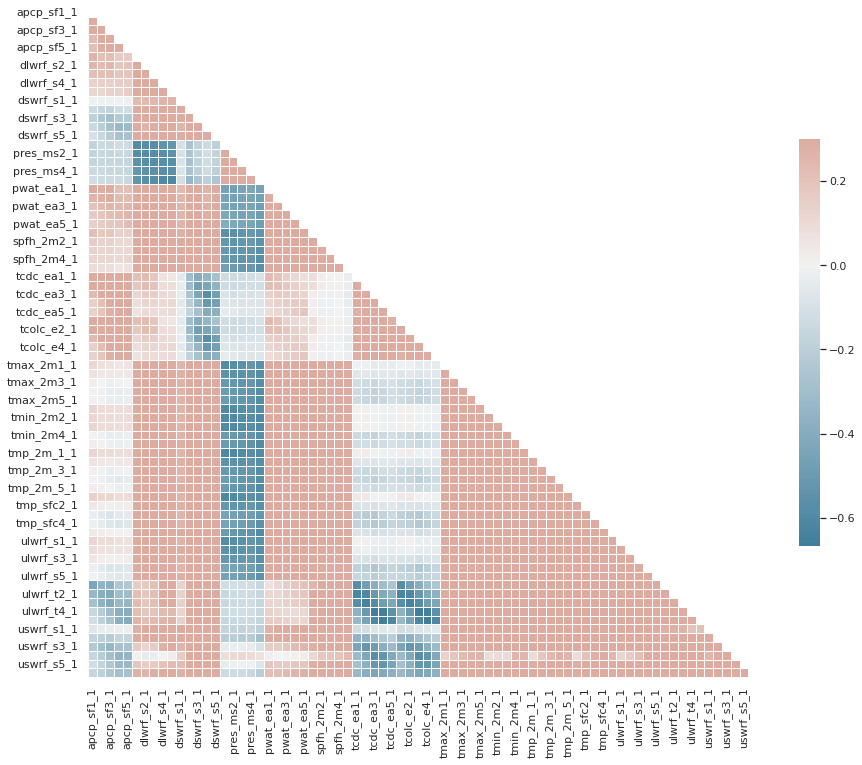

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = disp_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **División de datos**
Como se puede ver en el código a continuación, dividiremos los datos de acuerdo con el enunciado establecido. Esto es, utilizaremos los **10 primeros años** del conjunto de datos disponibles para **entrenamiento** (*train*) y los **2 últimos años** para **pruebas** (*test*).</br></br>

Dado que se nos pide que no desordenemos los datos antes de partir en entrenamiento y test para poder respestar el orden temporal, usaremos el parámetro `shuffle = False` al invocar a la función `train_test_split` de Scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

# Entrenamiento (10 primeros años) y test (2 últimos años).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/12, random_state=13, shuffle=False)

# !!! REVISAR !!!
# ¿V1 ES EL DATO MÁS ANTIGUO O EL MÁS NUEVO?
# !!! REVISAR !!!

# Comprobamos que los datos se hayan dividido como queremos.
print(X_train.shape, y_train.shape)   # 3650 días -> 10 años.
print(X_test.shape, y_test.shape)     # 720 días  ->  2 años.


Como se puede ver y, como hemos explicado anteriormente, dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*) mediante `random_state = 13`.

# **Métodos Básicos**
Para los modelos básicos, consideraremos los siguientes **métodos básicos**:
+ KNN
+ Árboles de regresión
+ Regresión lineal

Además, destacar que las métricas de evaluación son **RMSE** y **MAE**.

## **Evaluación con hiperparámetros por omisión**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression

from sklearn import metrics

### **KNN** -> Se puede normalizar con lo visto en clase. Si normalizamos la salida hay que desnormalizar la salida a la hora de calcular los erroes.

In [ ]:
clf = KNeighborsRegressor()
np.random.seed(13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Calculo del error cuadrático medio
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"Error cuadrático medio del modelo KNN: {rmse_knn}")

#Calculo del error absoluto medio
mae_knn = metrics.mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio del modelo KNN: {mae_knn}")
np.random.seed(13)

### **Árboles de regresión**

In [ ]:
clf = tree.DecisionTreeRegressor()
np.random.seed(13)
clf.fit(X_train, y_train)

In [ ]:
# Predicciones del conjunto de test.
y_pred = clf.predict(X_test)
print(y_pred)

In [ ]:
# Comparación de predicciones actuales con 
print(np.hstack((y_pred[:5,np.newaxis], y_test[:5,np.newaxis])))

In [ ]:
from sklearn.dummy import DummyRegressor

rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE del árbol: {rmse_tree}")

#Probamos si es mejor que un dummy regressor tree

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))

print(f"RMSE del arbol dummy (mean): {rmse_mean}")
print(f"RMSE ratio tree/dummy(mean): {rmse_tree/rmse_mean}")


mae_tree = metrics.mean_absolute_error(y_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train, y_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test))

print(f"MAE of the tree: {mae_tree}")
print(f"MAE of dummy (median): {mae_median}")
print(f"MAE ratio tree/dummy(median): {mae_tree/mae_median}")

### **Regresión lineal**

`### **Validación Cruzada** (Usar PredefineSplit(test_fold), alomejor va en ajustes de hiperparametros pero creo que no) 

## **Ajuste de hiperparámetros**

### **KNN**

### **Árboles de regresión**

### **Regresión lineal**

## **Conclusiones**
Responder a:
+ ¿Cuál es el mejor método?
+ ¿Cuál de los métodos
básicos de aprendizaje automático es más rápido?
+ ¿Los resultados son mejores que los
regresores triviales/naive/baseline?
+ ¿El ajuste de hiperparámetros mejora con respecto a los
valores por omisión?
+ ¿Hay algún equilibrio entre tiempo de ejecución y mejora de
resultados? 

## **Reducción de dimensionalidad**

# **Métodos avanzados**

## **Evaluación con hiperparámetros por omisión**

### **SVMs**

### **Random Forests**

## **Ajuste de hiperparámetros**

### **SVMs**

### **Random Forests**

## **Interpretación de la importancia de los atributos**

## **Conclusiones**

Como podemos ver en el resultado anterior, la precisión (accuracy) del árbol creado es 0.0, por lo que es nula. Por tanto, se puede ver como el primer modelo claramente no es adecuado para nuestros datos. De esta forma, tendremos que estudiar otro tipo de modelo.